# Introduction: 

**"This project involves wrangling data obtained from three sources, all of which relate to the famous WeRateDogs (@dog_rates) Twitter account. WeRateDogs is a Twitter account that tweets images of dogs their owners send in, along with a funny caption and a rating that almost always exceeds 10/10. An example tweet follows."**

## Gather:
This project encompass three dataset:
- Twitter archive (csv file)
- Image predictions for dogs(tsv file), we will download it programatically as a url by using request library.
-  Twitter info which is on twitter servers encompassed in Twitter archieve , we will download it by Tweepy library.


In [4]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import matplotlib.pyplot as plt

In [5]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [6]:
#Download tsv file by using request library

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(url.split('/')[-1], mode="wb") as file:
    file.write(response.content)

image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')
response

<Response [200]>

In [7]:
# my API keys
consumer_key = 'consumer_key'
consumer_secret = 'consumer_secret'
access_token = 'access_token'
access_secret = 'access_secret'

#Tweepy Query
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True,
                  wait_on_rate_limit_notify=True)

In [8]:
#tweet = api.get_status('666050758794694657')
#print(tweet.text)

In [9]:
#with open('tweet_json.txt', 'w') as json_file:
 #    for tweet_ids in image_predictions.tweet_id:
  #          try:
   #             tweets_status = api.get_status(tweet_ids)
    #            json_tweets = json.dumps(tweets_status._json)
     #       except:
      #          continue
       #     json_file.write(json_tweets + '\n')

In [10]:
with open('tweet_json.txt') as json_f:
    tweets_info = pd.DataFrame(columns = ['tweet_id','favorites','retweets'])
    
    for info in json_f:
        tweets = json.loads(info)
        data = {'tweet_id': tweets['id'],'favorites': tweets['favorite_count'],
                                      'retweets': tweets['retweet_count']}
        ser = pd.Series(data)
        tweets_info = tweets_info.append(data,ignore_index=True)
tweets_info.head()

,tweet_id,favorites,retweets
0,666020888022790149,2530,501
1,666029285002620928,125,47
2,666033412701032449,123,43
3,666044226329800704,293,139
4,666049248165822465,106,41


#  Assess

 


In [11]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
tweets_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2067 entries, 0 to 2066
Data columns (total 3 columns):
tweet_id     2067 non-null object
favorites    2067 non-null object
retweets     2067 non-null object
dtypes: object(3)
memory usage: 48.5+ KB


In [14]:
tweets_info.describe()

,tweet_id,favorites,retweets
count,2067,2067,2067
unique,2067,1854,1599
top,808501579447930884,0,1253
freq,1,75,5


In [15]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [16]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
all_columns = pd.Series(list(twitter_archive) + list(image_predictions) + list(tweets_info))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

In [18]:
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
421,821886076407029760,NaN,NaN,2017-01-19 01:04:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jimison. He was just called a good boy...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/821886076...,13,10,Jimison,None,None,None,None
2277,667437278097252352,NaN,NaN,2015-11-19 20:20:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never seen this breed before. Very pointy pup....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667437278...,10,10,None,None,None,None,None
297,837110210464448512,NaN,NaN,2017-03-02 01:20:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Clark. He passed pupper training today...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/837110210...,13,10,Clark,None,None,pupper,None
1738,679527802031484928,NaN,NaN,2015-12-23 05:03:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This little pupper just arrived. 11/10 would s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679527802...,11,10,None,None,None,pupper,None
960,751205363882532864,NaN,NaN,2016-07-08 00:04:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""This photographer took pics of her best frien...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/751205363...,12,10,None,None,None,None,None
550,804738756058218496,NaN,NaN,2016-12-02 17:27:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Django. He accidentally opened the fro...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/804738756...,12,10,Django,None,None,None,None
329,833479644947025920,NaN,NaN,2017-02-20 00:53:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Poppy. She just arrived. 13/10 would s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/833479644...,13,10,Poppy,None,None,None,None
342,832088576586297345,8.320875e+17,30582082.0,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
1728,679872969355714560,NaN,NaN,2015-12-24 03:55:21 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Rocco. He's in a very intense game of ...,NaN,NaN,NaN,https://vine.co/v/iAAxTbj1UAM,10,10,Rocco,None,None,None,None


In [19]:
twitter_archive.tweet_id.duplicated().sum()

0

In [20]:
twitter_archive.name.sort_values()

1035            Abby
1021            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
144            Albus
412            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
2238           Alfie
661            Alfie
367            Alfie
1616           Alfie
858            Alfie
51              Alfy
201            Alice
1701           Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
            ...     
852               my
988              not
335              not
1747      officially
1206             old
993              one
1936             one
924              one
369              one
2326           quite
169            quite
118            quite
193            quite
2030           space
22              such
2345             the
2346         

In [21]:
sum(twitter_archive.rating_numerator.isnull())

0

In [22]:
sum(twitter_archive.rating_denominator.isnull())

0

In [23]:
twitter_archive.query('rating_numerator ==1776')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [24]:
twitter_archive.query('rating_denominator <10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


### Quality

##### `Twitter-archive ` table:
- None values in name of dogs and incorrect dogs name like: "a", "an", "such","the", "very"...
- tweet_ id should convert to str.
- Useless columns such as in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id,  retweeted_status_user_id ,retweeted_status_timestamp  should be removed.
- timestamp should convert to timestamp datatype.
- there is no particular limit or specific numeric values of rating denominator such as 0, 2,7,...
- rating_numerator and rating_denominator should convert to float.


##### `image_predictions ` table:
- tweet_id should convert to str


##### `tweets_info ` table:
- favorite and retweets columns should convert to int datatype.



 
 ### Tidiness :
 
 
 - We have 3 datasets,  `twitter_archive` , `image_predictions`, and `tweets_json` dataset , we should merge it in one dataframe.
 - We have three seperate columns of dog categories.
 


 



 
 ### Clean :

 
#### Define: 
convert tweet_id, retweets, and favorites in (tweet_info) table to int datatype


 


##### Code:

In [25]:
tweets_info['tweet_id'] = tweets_info['tweet_id'].apply(pd.to_numeric, errors='coerce')
tweets_info['favorites'] = tweets_info['favorites'].apply(pd.to_numeric, errors='coerce')
tweets_info['retweets'] = tweets_info['retweets'].apply(pd.to_numeric, errors='coerce')

##### Test:

In [26]:
tweets_info.dtypes


tweet_id     int64
favorites    int64
retweets     int64
dtype: object

Tidiness:
##### Define:
Merge all three datasets to one dataset, and change datatype of tweet_id, in (twitter_archive_clean and image_predictions_clean.tweet_id) tables:

##### Code:

In [27]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweets_info_celan = tweets_info.copy()

In [28]:
#merge all datasets tables in one dataset
twitter_archive_clean = pd.merge(twitter_archive_clean, tweets_info_celan, on = 'tweet_id', how = 'inner')
twitter_archive_clean = pd.merge(twitter_archive_clean, image_predictions_clean, on = 'tweet_id', how = 'inner')

In [29]:
#change tweet_id datatype
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype(str)

##### Test:

In [30]:
twitter_archive_clean[twitter_archive_clean.duplicated(['tweet_id'], keep=False)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


##### Defin:
 After merging all datasets, we will check for duplicated 'tweet_id'

##### Code:
remove duplicated rows

In [31]:
twitter_archive_clean.drop([362], inplace=True)
twitter_archive_clean.drop([459], inplace=True)
twitter_archive_clean.drop([561], inplace=True)
twitter_archive_clean.drop([718], inplace=True)

##### Test:

In [32]:
twitter_archive_clean[twitter_archive_clean.duplicated(['tweet_id'], keep=False)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


##### Define:
- Change datatype of timestamp from str to datetime.

- Convet datatype of rating_numerator rating_denominator to float.       


##### Code:

In [33]:
#converttimestamp to timestamp datatype , convert  datatype of rating_numerator and denominator to float

twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])
twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_numerator.astype('float')
twitter_archive_clean.rating_denominator = twitter_archive_clean.rating_denominator.astype('float')

##### Test:

In [34]:
#check datatype of retweeted_status_timestamp
twitter_archive_clean.iloc[0,3],type(twitter_archive_clean.iloc[0,3])


(Timestamp('2017-08-01 16:23:56'), pandas._libs.tslibs.timestamps.Timestamp)

In [35]:
type(twitter_archive_clean.iloc[0,10])
type(twitter_archive_clean.iloc[0,11])


numpy.float64

##### Define:
remove useless columns such as retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp

##### Code:

In [36]:
#drop useless columns
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id', 
'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)


##### Test:

In [37]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2063 entries, 0 to 2066
Data columns (total 25 columns):
tweet_id              2063 non-null object
timestamp             2063 non-null datetime64[ns]
source                2063 non-null object
text                  2063 non-null object
expanded_urls         2063 non-null object
rating_numerator      2063 non-null float64
rating_denominator    2063 non-null float64
name                  2063 non-null object
doggo                 2063 non-null object
floofer               2063 non-null object
pupper                2063 non-null object
puppo                 2063 non-null object
favorites             2063 non-null int64
retweets              2063 non-null int64
jpg_url               2063 non-null object
img_num               2063 non-null int64
p1                    2063 non-null object
p1_conf               2063 non-null float64
p1_dog                2063 non-null bool
p2                    2063 non-null object
p2_conf               2063 

##### Define:
Check for incorrect dog names, and make it as Nan then put it as "None" rows.

##### Code:

In [38]:
twitter_archive_clean.name.sort_values()

831             Abby
842             Abby
763              Ace
1650            Acro
1104           Adele
1651           Aiden
66               Aja
379            Akumi
659               Al
707           Albert
1670          Albert
119            Albus
324            Albus
914          Aldrick
1761       Alejandro
294        Alexander
986     Alexanderson
384              Alf
1359           Alfie
1950           Alfie
691            Alfie
287            Alfie
527            Alfie
46              Alfy
1436           Alice
159            Alice
1254           Amber
1111         Ambrose
1793             Amy
1908          Amélie
            ...     
866             just
1222            just
1735            just
661             just
1717           light
686               my
805              not
1478      officially
1653             one
751              one
810              one
289              one
153            quite
2037           quite
139            quite
1746           space
21           

In [39]:
#check for unclear dog names
twitter_archive_clean['name'].unique()


array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Emmy',
       'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti',
       'Goose', 'Nugget', 'Cash', 'Jed', 'Sebastian', 'Sierra', 'Monkey',
       'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Boomer', 'Cody',
       'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Walter',
       'Cooper', 'Harold', 'Shikha', 'Lili', 'Jamesy', 'Coco', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', 'Belle', 'Quinn',
       'Zooe

In [40]:
#replace incorrect name with NaN
twitter_archive_clean.name.replace(['such', 'an', 'the', 'just', 'by', 'a', 'mad', 'old', 'space', 
             'quite', 'actually', 'infuriating', 'all', 'officially', 'my', 'unacceptable', 'incredibly',
              'not', '0', 'life', 'one', 'his', 'very'],np.NaN, inplace =True)

In [41]:
#put all NaN values in "None"
twitter_archive_clean['name'].fillna(value="None", inplace=True)

##### Test:

In [42]:
twitter_archive_clean.name.value_counts()

None         671
Lucy          10
Tucker        10
Cooper        10
Penny         10
Charlie       10
Oliver        10
Lola           8
Bo             8
Winston        8
Sadie          8
Toby           7
Daisy          7
Stanley        6
Bailey         6
Dave           6
Rusty          6
Koda           6
Scout          6
Bella          6
Milo           6
Jax            6
Larry          5
Alfie          5
Oscar          5
Buddy          5
Chester        5
Louis          5
Leo            5
Chip           4
            ... 
Tug            1
Carly          1
Jarvis         1
Finnegus       1
Banjo          1
Ronduh         1
Dante          1
Ralf           1
Crouton        1
Kuyu           1
Filup          1
Evy            1
Charleson      1
Grizz          1
Rolf           1
Freddery       1
Jonah          1
Aja            1
Jeffrie        1
Nugget         1
Rupert         1
Spark          1
Tilly          1
Mairi          1
William        1
Tuck           1
Gustav         1
Kara          

In [43]:
twitter_archive_clean.rating_denominator.describe()

count    2063.000000
mean       10.514300
std         7.197819
min         2.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

##### Define:
after checking of rating_denominator, we found that there is no based of specific value or limit of denomirator, and after using describe function we found that mean ,first, second and third quartiles are equals 10 value, we will remove that rating_denominator which are less than 10.

In [44]:
#check rate that is not 10 
rating_denominator_not_equal_10 = twitter_archive_clean[twitter_archive_clean['rating_denominator']< 10]


In [45]:
rating_denominator_not_equal_10

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
411,810984652412424192,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24.0,7.0,Sam,None,None,...,1,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True
2046,666287406224695296,2015-11-16 16:11:11,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,1.0,2.0,None,None,None,...,1,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True


##### Code:


In [46]:
#we want to make one based rating_denominator which is 10
#inappropriate_values =[7.0,2.0]   
 

#for values in twitter_archive_clean.rating_denominator:
    #if values in inappropriate_values:
        #twitter_archive_clean.rating_denominator[twitter_archive_clean.rating_denominator == values] = 10.0

In [47]:
twitter_archive_clean.drop([411], inplace=True)
twitter_archive_clean.drop([2046], inplace=True)

##### Test:


In [48]:
twitter_archive_clean[twitter_archive_clean['rating_denominator']==7.0]
twitter_archive_clean[twitter_archive_clean['rating_denominator']==2.0]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [49]:
twitter_archive_clean.rating_denominator.value_counts()

10.0     2045
50.0        3
80.0        2
11.0        2
150.0       1
110.0       1
90.0        1
130.0       1
70.0        1
170.0       1
120.0       1
40.0        1
20.0        1
Name: rating_denominator, dtype: int64

##### Define:
We want to melt dog types into one column.


##### Code:


In [50]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 0 to 2066
Data columns (total 25 columns):
tweet_id              2061 non-null object
timestamp             2061 non-null datetime64[ns]
source                2061 non-null object
text                  2061 non-null object
expanded_urls         2061 non-null object
rating_numerator      2061 non-null float64
rating_denominator    2061 non-null float64
name                  2061 non-null object
doggo                 2061 non-null object
floofer               2061 non-null object
pupper                2061 non-null object
puppo                 2061 non-null object
favorites             2061 non-null int64
retweets              2061 non-null int64
jpg_url               2061 non-null object
img_num               2061 non-null int64
p1                    2061 non-null object
p1_conf               2061 non-null float64
p1_dog                2061 non-null bool
p2                    2061 non-null object
p2_conf               2061 

In [51]:
twitter_archive_clean = pd.melt(twitter_archive_clean,
                        id_vars=['tweet_id','timestamp', 'source', 'text','expanded_urls', 'rating_numerator', 'rating_denominator',
                                              'name','favorites', 'retweets', 'jpg_url', 'img_num', 'p1',
                                              'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf','p3_dog'], value_name='dog_types')
twitter_archive_clean = twitter_archive_clean.drop('variable', axis=1)

##### Test:


In [52]:
#null values in each column 
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8244 entries, 0 to 8243
Data columns (total 22 columns):
tweet_id              8244 non-null object
timestamp             8244 non-null datetime64[ns]
source                8244 non-null object
text                  8244 non-null object
expanded_urls         8244 non-null object
rating_numerator      8244 non-null float64
rating_denominator    8244 non-null float64
name                  8244 non-null object
favorites             8244 non-null int64
retweets              8244 non-null int64
jpg_url               8244 non-null object
img_num               8244 non-null int64
p1                    8244 non-null object
p1_conf               8244 non-null float64
p1_dog                8244 non-null bool
p2                    8244 non-null object
p2_conf               8244 non-null float64
p2_dog                8244 non-null bool
p3                    8244 non-null object
p3_conf               8244 non-null float64
p3_dog                8244 

In [53]:
import seaborn as sns    
%matplotlib inline
plt.rcParams['figure.figsize']=(12,13)

### Visualization:
After finishing wrangling part which is encompass gathering , assessing, and cleaning the given data, here we want to answer some questions by using  visualizing.


We used some attributes after we gathered ,assessed, and cleaned our data, such as, retweets rate , favorites rates, dog categories and dog names.




In [54]:
twitter_archive_clean.drop(twitter_archive_clean.query('(dog_types == "None")').index ,inplace=True)

**Find out the dog category with the highest favorites rate**


In this first part ,we want to find out the category  which is recorded the highest rate of favorites,  after we removing None values, and visualizing the the chart, we can say that , puppo dog recorded the highest rate, then doggo, floofer, and pupper.


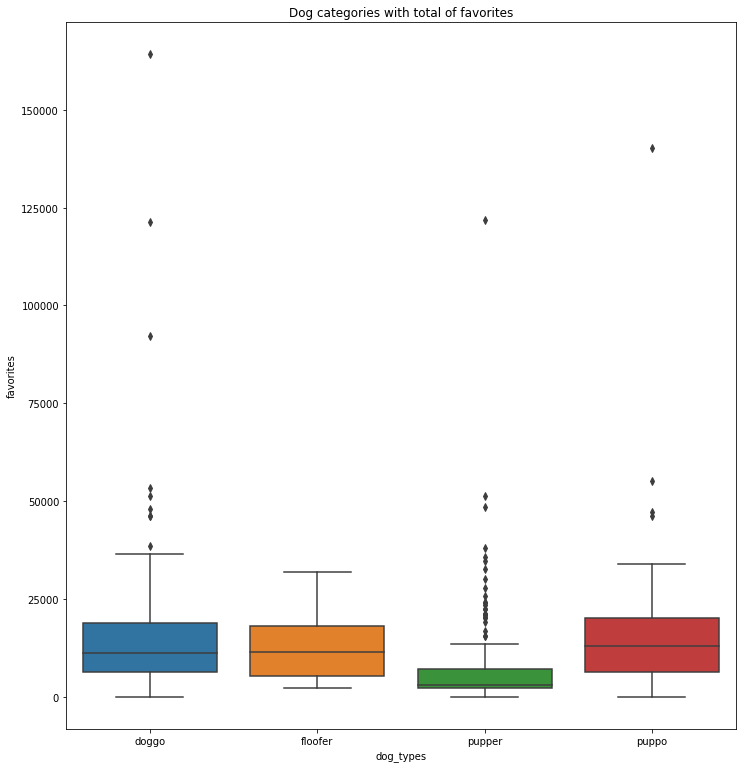

In [55]:
sns.boxplot(x="dog_types", y="favorites", data=twitter_archive_clean).set_title('Dog categories with total of favorites');



In [56]:
#calculate rating ration
twitter_archive_clean['rating_ratio'] = twitter_archive_clean['rating_numerator']/twitter_archive_clean['rating_denominator']

**Discover the ratio of dog rating distribution**

Here after we calculated the ratio of dog rating from(rating numerator  /rating denominator)rate, we can see that the chart takes normally distribution of dogs rating.

C:\Users\farah\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


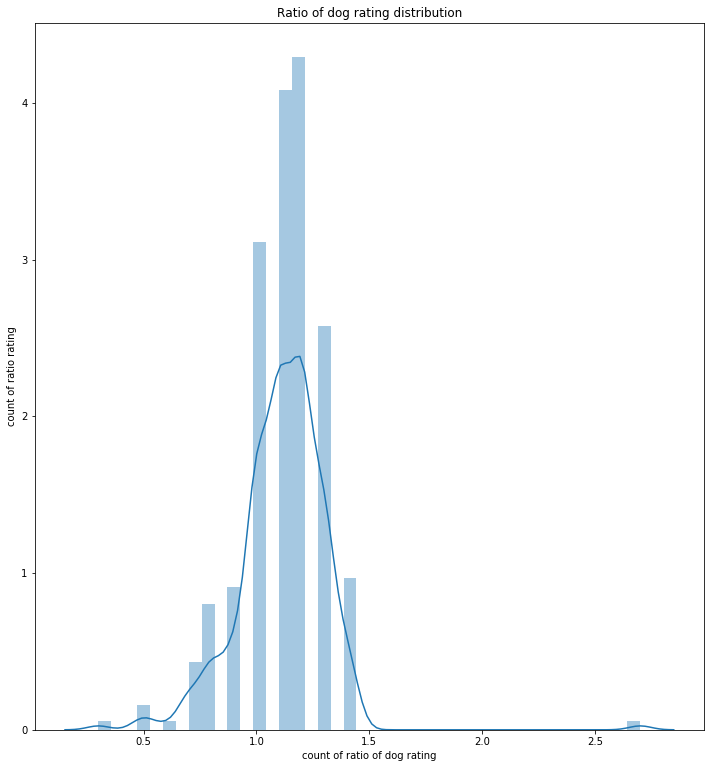

In [57]:
sns.distplot(twitter_archive_clean.rating_ratio).set_title('Ratio of dog rating distribution');
plt.xlabel('count of ratio of dog rating')
plt.ylabel('count of ratio rating')
plt.show();



**Find out the  top 60 of dog names with retweets rate.**

In the last part, after removed None values,  and removed inappropriate dog names  such as ("a", "an", "the", "very", "quite",... we,  want to find out the top 60 of dog names which are recorded the highest retweets rating.

As we can see from the chart the name of dog ("Bo") recorded the highest rate of retweets, then the name of dog "Jamesy". 


In [58]:
twitter_archive_clean.drop(twitter_archive_clean.query('(name == "None")').index ,inplace=True)

C:\Users\farah\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


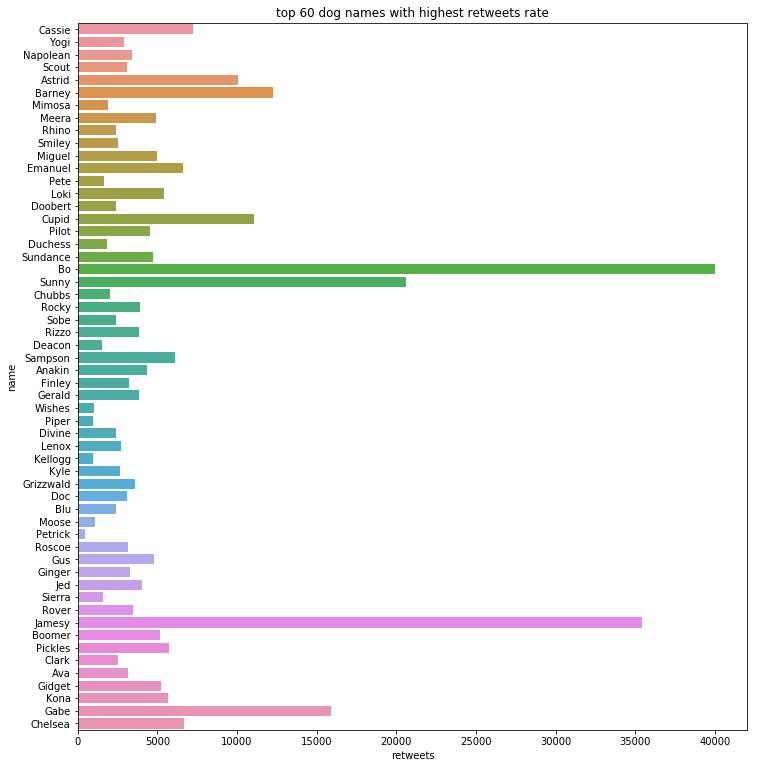

In [59]:
sns.barplot(y="name", x="retweets", data = twitter_archive_clean[0:60]).set_title('top 60 dog names with highest retweets rate');


In [60]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

In [61]:
twitter_archive_clean.to_csv('(act_report.pdf', encoding='utf-8', index=False)